#                                                 REDDIT APP DATA / CLASSWORK-3 

**Installing the PRAW package**

In [2]:
pip install praw

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   -- ------------------------------------- 10.2/191.0 kB ? eta -:--:--
   ------------------- -------------------- 92.2/191.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 191.0/191.0 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
##importing praw package
import praw
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="_pv720xfCgXOHEmbgBNCgg",
    client_secret="3k3wbDwk3dRlWrlw7CzB62_3RX_NIA",
    user_agent=user_agent)

**IMPORTING REQUIRED PACKAGES**

In [4]:
#importing pandas , numpy and regex modules
import pandas as pd
import numpy as np
import re #RegEx : Regular expression



# **SELECT TRENDING TOPIC FROM REDDIT**

The "bitcoin" subreddit channel will be use for this project

In [5]:
# Hot new rising topics
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
16bm9de
BitcoinFan7
1694011779.0
202
0.95
https://www.reddit.com/r/Bitcoin/comments/16bm9de/bitcoin_newcomers_faq_please_read/
0


**GET TOTAL COMMENT IN SUBREDDIT**

In [6]:
#top posts from the "bitcoin" subreddit using PRAW
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

786


# **PREPOCESSING THE DATA**


**DATA SCRAPING**

In [7]:
#Create a dataframe from the scrapped data
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,Intrusive thoughts won
1,Just discovered Satstralia during a prolonged ...
2,Sparrow Wallet Problem
3,The struggle is real..
4,Bitcoin Bank


**REMOVING UNWANTED COLUMNS FROM THE DATA FRAME**

In [8]:
df = bitcoin_df.iloc[:, 1:]#removes unwanted columns in left
bitcoin_df.head()

,0
0,Intrusive thoughts won
1,Just discovered Satstralia during a prolonged ...
2,Sparrow Wallet Problem
3,The struggle is real..
4,Bitcoin Bank


**RETRIEVING COLUMN NAME**

In [9]:
#gives the column names
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

**RENAMING COLUMNS OF THE DATA FRAME**

In [10]:
#renaming the column to titles
bitcoin_df.columns = ['Titles']

**HEAD METHOD**

In [11]:
#Gives first five columns in the dataframe
bitcoin_df.head()

,Titles
0,Intrusive thoughts won
1,Just discovered Satstralia during a prolonged ...
2,Sparrow Wallet Problem
3,The struggle is real..
4,Bitcoin Bank


**COUNTING DUPLICATE VALUES**

In [12]:
#counts the number of duplicate values in the 'Titles' column
bitcoin_df.Titles.duplicated().sum()

0

**REDDIT APP DATA PREPROCESSING FOR BITCOIN ANALYSIS**

In [13]:
#Clean the text
#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :

    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,Intrusive thoughts won
1,Just discovered Satstralia during a prolonged ...
2,Sparrow Wallet Problem
3,The struggle is real..
4,Bitcoin Bank


**REMOVING EMOJI'S AND UNICODE FROM REDDIT DATA FOR ENHANCED ANALYSIS**

In [14]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Intrusive thoughts won
1,Just discovered Satstralia during a prolonged ...
2,Sparrow Wallet Problem
3,The struggle is real..
4,Bitcoin Bank


**TEXT ANALYSIS AND VISUALISATION FOR TEXTBLOB AND WORDCLOUD**

In [15]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 217.9 kB/s eta 0:00:03
     -- ---------------------------------- 41.0/636.8 kB 217.9 kB/s eta 0:00:03
     ----- ------------------------------- 92.2/636.8 kB 438.1 kB/s eta 0:00:02
     ---------------- --------------------- 276.5/636.8 kB 1.1 MB/s eta 0:00:01
     -------------------------------------  634.9/636.8 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 2.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
#importing modules
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS


**SENTIMENT ANALYSIS: SUBJECTIVITY AND POLARITY OF BITCOIN RELATED TEXT**

In [17]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()


,Titles,Subjectivity,Polarity
0,Intrusive thoughts won,0.0,0.0
1,Just discovered Satstralia during a prolonged ...,0.5,0.5
2,Sparrow Wallet Problem,0.0,0.0
3,The struggle is real..,0.3,0.2
4,Bitcoin Bank,0.0,0.0


**CATEGORIZING BITCOIN SENTIMENT**

In [18]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Intrusive thoughts won,0.000000,0.000000,Neutral
1,Just discovered Satstralia during a prolonged ...,0.500000,0.500000,Positive
2,Sparrow Wallet Problem,0.000000,0.000000,Neutral
3,The struggle is real..,0.300000,0.200000,Positive
4,Bitcoin Bank,0.000000,0.000000,Neutral
5,$30M mansion hunt leads to $1.7B Bitcoin seizure,0.000000,0.000000,Neutral
6,"Whatever the Data Exchange Channel, the Bitcoi...",0.888889,0.277778,Positive
7,Bitcoin stuck over a month,0.000000,0.000000,Neutral
8,*Updated* Free iOS/watch/mac/vision/appletv bi...,0.627273,0.333168,Positive
9,Did you buy any crypto this week?,0.000000,0.000000,Neutral



# **Data Visualization**

In [19]:
#create visualizations using Seaborn, WordCloud, and Matplotlib with a specific visual style
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


**VISUALIZING BITCOIN SENTIMENT DISTRIBUTION**

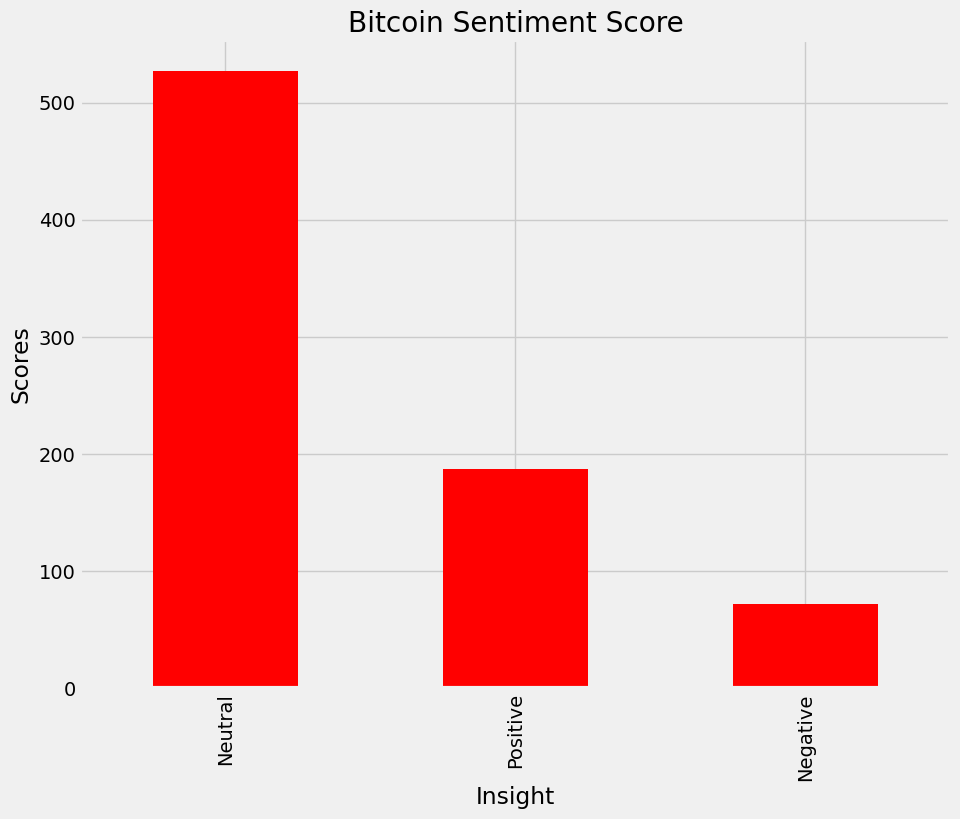

In [23]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="red")
plt.show()

# **WORDCLOUD FOR BITCOIN**

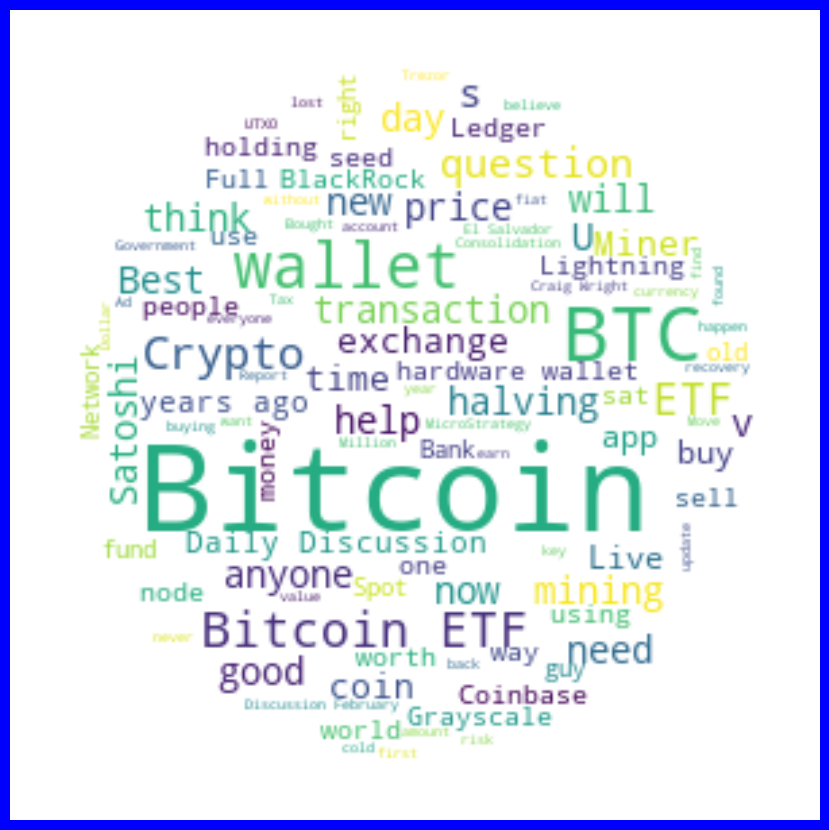

In [21]:
#importing the libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

# Combine all titles into a single string
text = ' '.join([twts for twts in bitcoin_df['Titles']])

# Define a custom shape
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# Generate word cloud
wordcloud = WordCloud(width=1000, height=600, max_words=100, stopwords=STOPWORDS,
                      background_color="white", mask=mask).generate(text)

# Display the generated image
plt.figure(figsize=(20, 10), facecolor='b')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

